In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")

print(df.head())



/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2  

> <h1> Introduction </h1>

<p> Since the first reports of cases from Wuhan, a city in the Hubei Province of China, at the end of 2019, more than 80,000 COVID-19 cases have been reported in China; these include all laboratory-confirmed cases as well as clinically diagnosed cases in the Hubei Province. A joint World Health Organization (WHO)-China fact-finding mission estimated that the epidemic in China peaked between late January and early February 2020. The majority of reports have been from Hubei and surrounding provinces, but numerous cases have been reported in other provinces and municipalities throughout China. 

<br>
<br>
To get to know this virus better, I think it's important that we all invest the effort and resources we have. I'm glad to see so many Data Scientists here sharing their visualizations and analysis.</p>

![](http://www.hopkinsmedicine.org/-/media/images/health/1_-conditions/infectious-diseases/coronavirus-hero.ashx?h=500&la=en&mh=500&mw=1300&w=1297&hash=6464CC9E4F6364821A5973E670CFB3342C2D9AF4)

In [2]:
# Quick overview of data

df.describe()
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
SNo                6722 non-null int64
ObservationDate    6722 non-null object
Province/State     3956 non-null object
Country/Region     6722 non-null object
Last Update        6722 non-null object
Confirmed          6722 non-null float64
Deaths             6722 non-null float64
Recovered          6722 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.rename(columns={"SNo" : "serial_number",
           "ObservationDate" : "observation_date",
           "Province/State" : "state",
           "Country/Region" : "country",
           "Last Update" : "last_update",
           "Confirmed" : "confirmed",
           "Deaths" : "deaths",
           "Recovered" : "recovered"},
          inplace=True)

In [4]:
# Grouping confirmed, recovered and death cases per country
grouped_country = df.groupby(["country"] ,as_index=False)["confirmed","recovered","deaths"].last().sort_values(by="confirmed",ascending=False)

# Using just first 10 countries with most cases
most_common_countries = grouped_country.head(10)

In [5]:
# FUNCTION TO SHOW ACTUAL VALUES ON BARPLOT

def show_valushowes_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


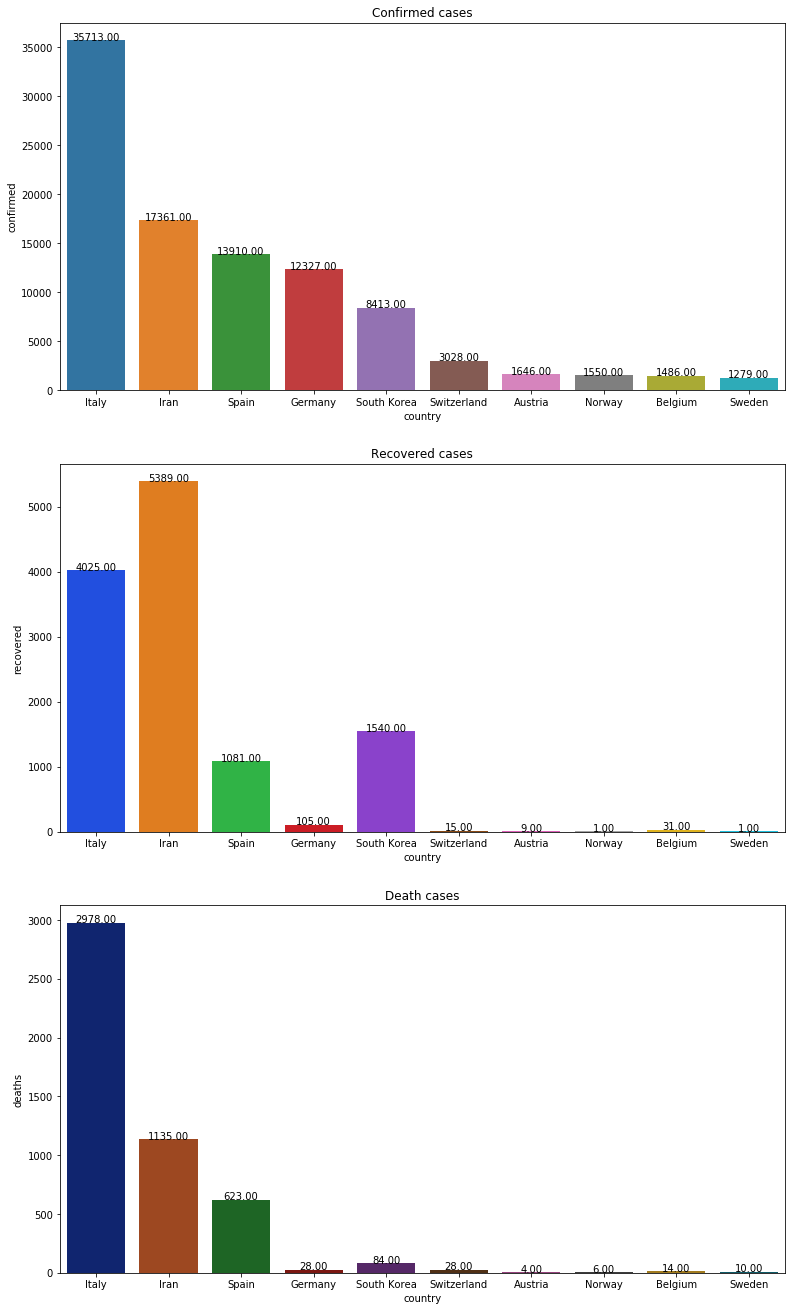

In [6]:
# Barplot: confirmed,recovered and death cases per country

plt.figure(figsize=(13,23))

# AXIS 1
plt.subplot(311)
vis_1 = sns.barplot(x="country",y="confirmed",data=most_common_countries)
vis_1.set_title("Confirmed cases")
show_valushowes_on_bars(vis_1)

# AXIS 2
plt.subplot(312)
vis_2 = sns.barplot(x="country",y="recovered",data=most_common_countries,palette="bright")
vis_2.set_title("Recovered cases")
show_valushowes_on_bars(vis_2)

# AXIS 3
plt.subplot(313)
vis_3 = sns.barplot(x="country",y="deaths",data=most_common_countries,palette="dark")
vis_3.set_title("Death cases")
show_valushowes_on_bars(vis_3)
plt.show()


In [7]:
fig_1 = px.bar(most_common_countries,x="country", y="confirmed",color="deaths",text="recovered",title="Countries with most cases.")
fig_1.show()

*As we can see, Italy has the largest increase in confirmed cases. Let's have a deeper insight into the overgrowth of the virus in Italy.*

In [8]:
# Function returns interactive lineplot of confirmed cases on specific country


def getGrowthPerCountryInteractive(countryName):
    country = df[df["country"] == countryName]

    fig_1 = px.line(country, x="observation_date", y="confirmed", title=(countryName + " confirmed cases."))
    fig_2 = px.line(country, x="observation_date", y="deaths", title=(countryName +" death cases"))
    fig_3 = px.line(country, x="observation_date", y="recovered", title=(countryName + " recovered cases"))

    fig_1.show()
    fig_2.show()
    fig_3.show()

I created this function to have fast visualization on any country.

In [9]:
getGrowthPerCountryInteractive("Italy")

As we know, the virus originated in China. To this end, we will analyze the rate at which the virus spread in China.

In [10]:
china = df[df["country"] == "Mainland China"]
fig_2 = px.bar(china,x="state",y="confirmed",color="recovered",text="deaths")
fig_2.show()


We can see that the largest increase (67.8k confirmed cases) is in Hubei. This information is expected because the unknown virus(later known as COVID19) was reported on December 31. in Wuhan, a port city of 11 million people in the central Hubei province. Several of those infected worked at the city's Huanan Seafood Wholesale Market, which was shut down on January 1. 
<br>

Let's take a closer look at how the virus spread in Hubei.

In [11]:
hubei = china[china["state"] == "Hubei"]

fig_3 = px.line(hubei,x="observation_date",y="confirmed",title="Hubei, China. Confirmed cases.")
fig_3.show()

fig_4 = px.bar(hubei, x="observation_date",y="confirmed",color="recovered",text="deaths", title="Hubei, China.")
fig_4.show()

Let's take a quick look on other states of China, because we didn't have a good look on the barplot above. To fix that, I will remove Hubei from dataframe so we can have a clear look on other states.

In [12]:
china_states = china[china["state"] != "Hubei"]

fig_5 = px.bar(china_states,x="state",y="confirmed", title="Confirmed cases in other states of China.")
fig_5.show()

In [13]:
fig_6 = px.bar(china_states, x="state",y="recovered",color="deaths",title="Recovered vs Deaths in other states of China.")
fig_6.show()

As we can see, Henan seems to be the state with most confirmed deaths. But, the thing is Henan has population 94 million people. But if we compare it to Guangdong(114 million population), it seems Guangdong is holding better with 8 deaths and 1313 recoveries.

<h3>I will continute to do analysis on this topic if you like it. Please upvote if you like this.</h3>